In [1]:
%load_ext autoreload
%autoreload 2
import cmcrameri.cm as cm  # Importing the cmcrameri colormaps
%run ct_data.py '../crunchtope_model/hydrothermal_crunch.nc' -c volume
%run pf_data.py '../pflotran_model/hydrothermal.nc'

Primary minerals: ['Anorthite', 'Albite', 'Diopside', 'Hedenbergite', 'Forsterite', 'Fayalite']
Secondary minerals: ['Tremolite', 'Prehnite', 'Talc', 'Quartz', 'Saponite_Mg', 'Epidote', 'Zoisite', 'Chamosite', 'Clinochlore', 'Analcime', 'Anhydrite', 'Calcite', 'Annite']
Primary mineral groups: {'olivine': ['Forsterite', 'Fayalite'], 'clinopyroxenes': ['Diopside', 'Hedenbergite'], 'plagioclases': ['Anorthite', 'Albite']}
Secondary mineral groups: {'clays': ['Saponite_Mg', 'Chamosite', 'Clinochlore'], 'zeolites': ['Analcime'], 'amphiboles': ['Tremolite'], 'inosilicates': ['Prehnite'], 'talc': ['Talc'], 'epidotes': ['Epidote', 'Zoisite'], 'sulfates': ['Anhydrite'], 'carbonates': ['Calcite'], 'quartz': ['Quartz'], 'mica': ['Annite']}
Primary minerals: ['Anorthite', 'Albite', 'Diopside', 'Hedenbergite', 'Forsterite', 'Fayalite']
Secondary minerals: ['Tremolite', 'Prehnite', 'Talc', 'Quartz', 'Saponite_Mg', 'Epidote', 'Zoisite', 'Chamosite', 'Clinochlore', 'Analcime', 'Anhydrite', 'Calcite',

In [2]:
# Parameters
basecase = 4
time = 1000

pf_data = pf_data.sel(file_number=basecase)

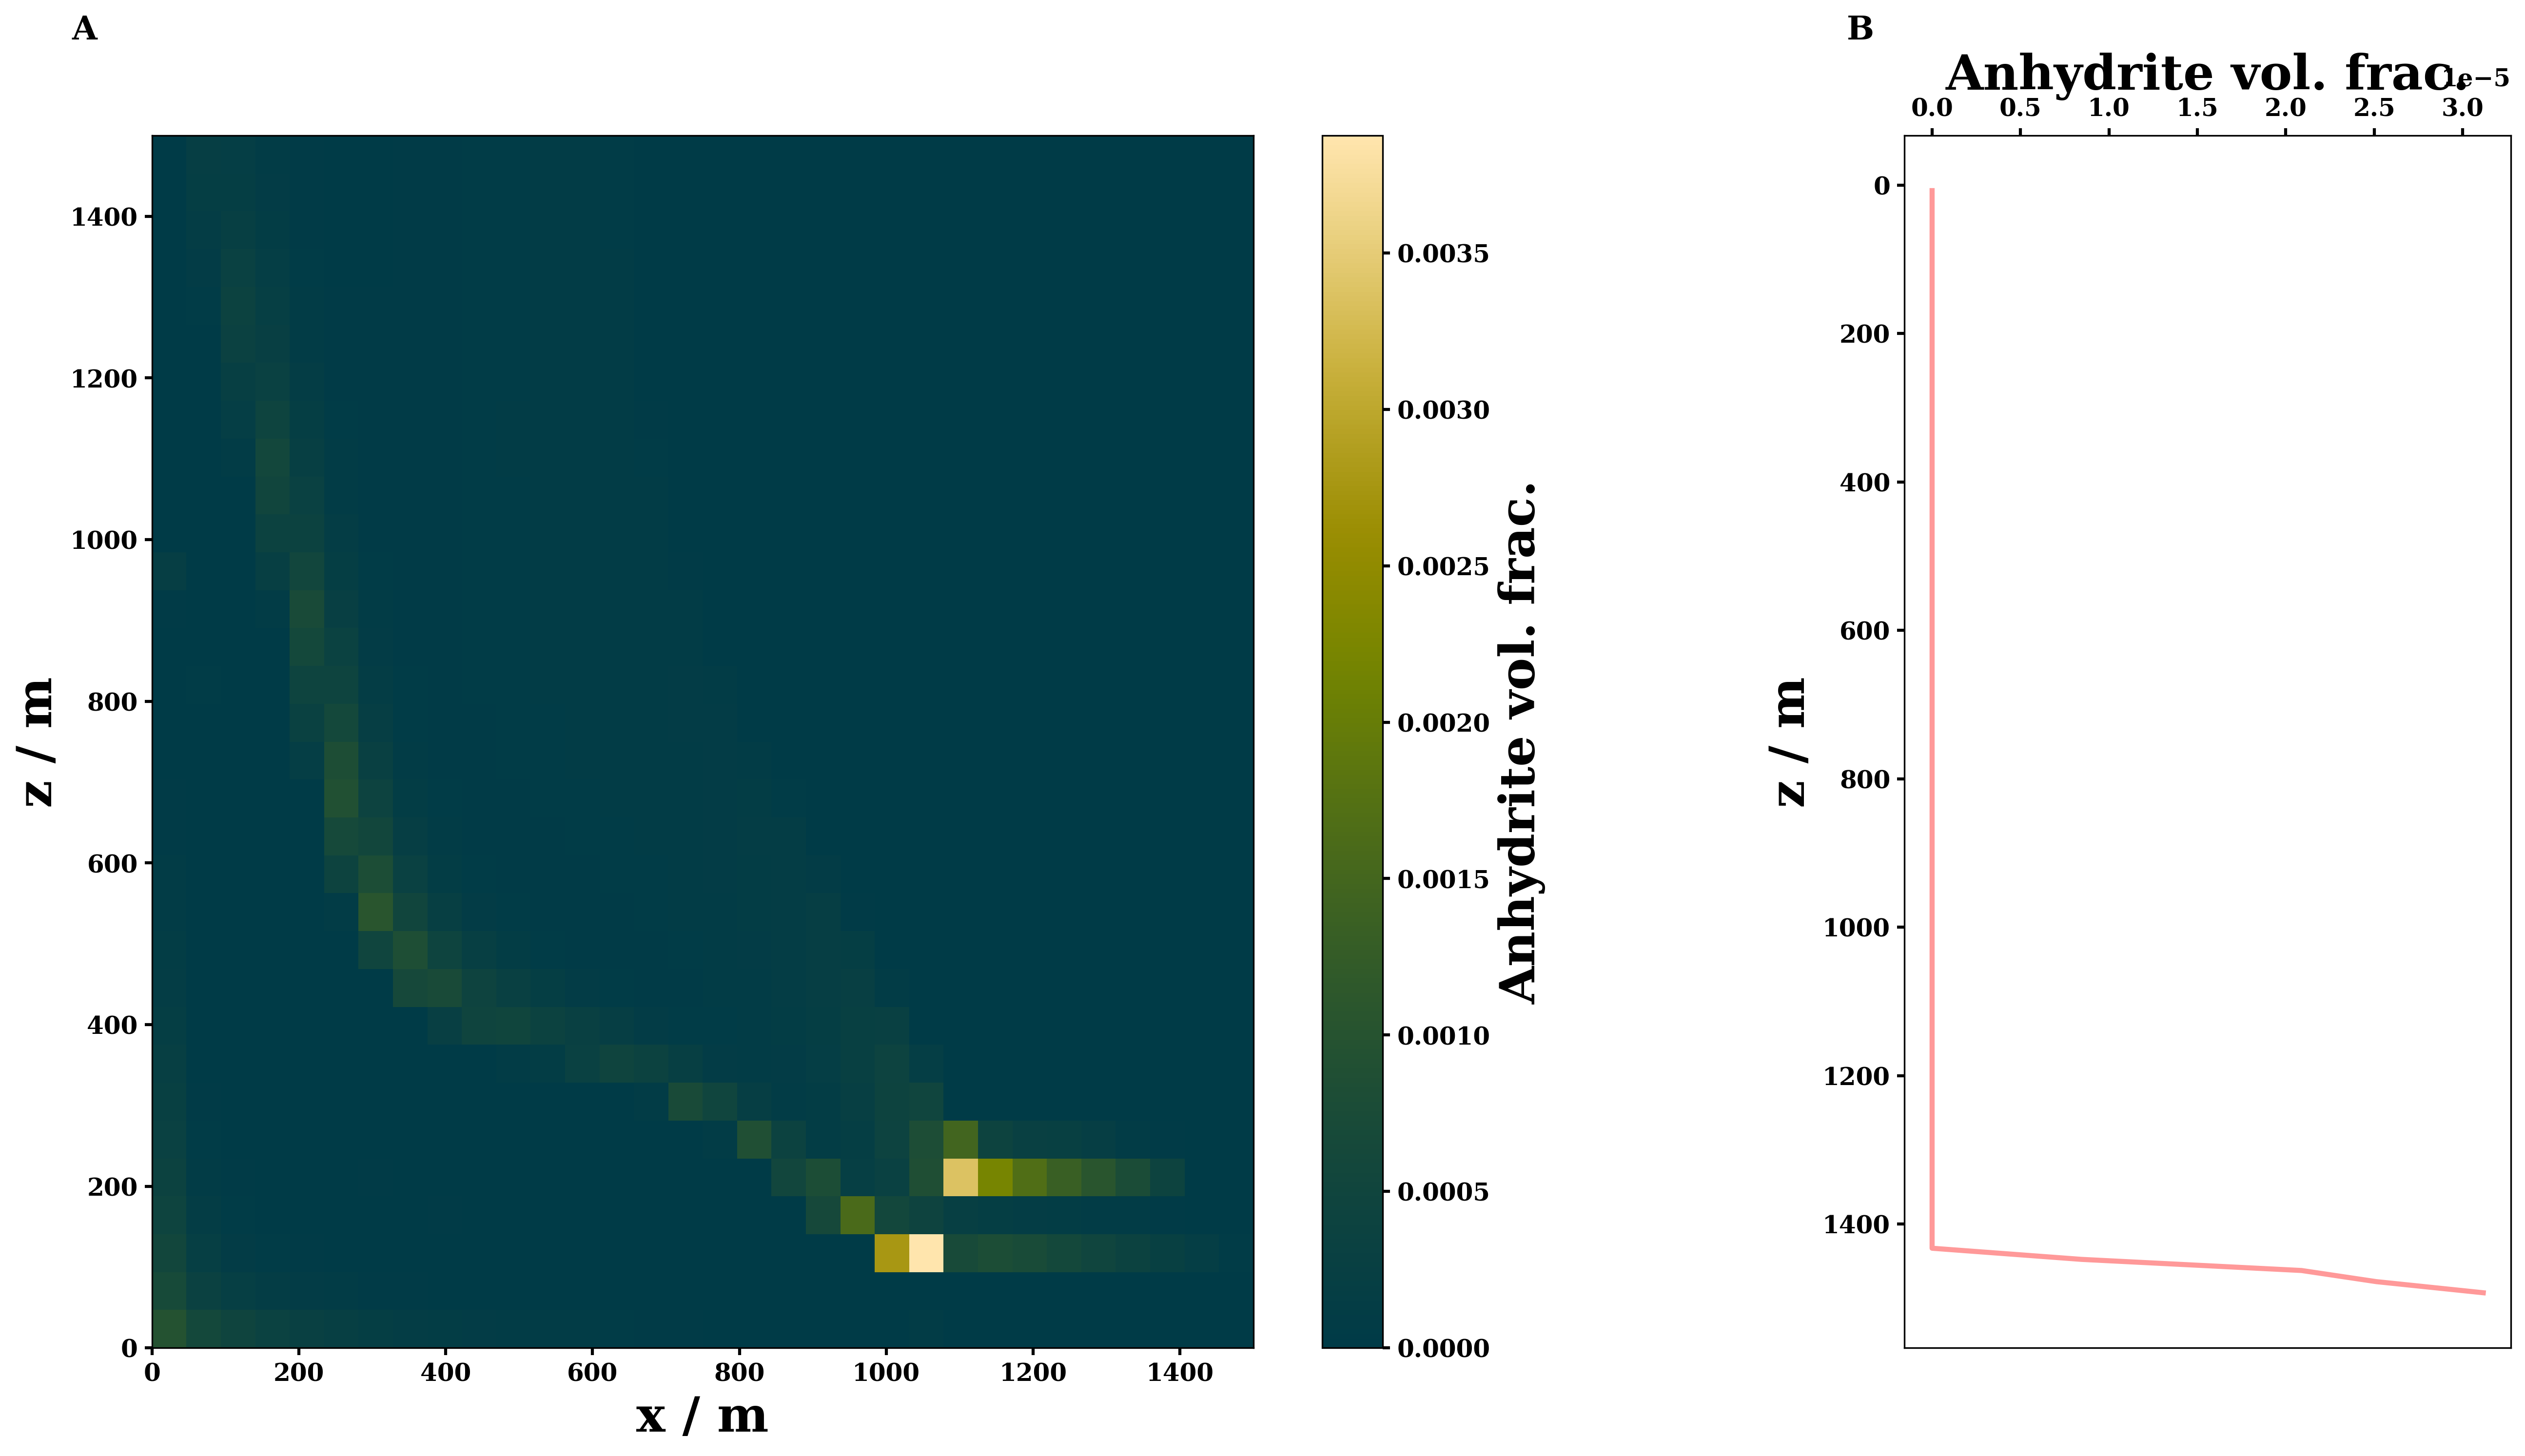

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import cmcrameri.cm as cm
import figures as figs

# Set custom style and font size
plt.style.use('custom.mplstyle')
fontsize = 24

# Create a figure with 1 row and 2 columns, specific figure size
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# PF alteration plot
mesh = ax[0].pcolormesh(pf_data['x'], pf_data['z'], 
                        pf_data['Anhydrite_VF'].sel(time=time).squeeze(), 
                        cmap=cm.bamako, shading='auto', c='k')
ax[0].set_xlabel('x / m', fontsize=fontsize)
ax[0].set_ylabel('z / m', fontsize=fontsize)

# Add colorbar to the first axis
cbar = fig.colorbar(mesh, ax=ax[0])
cbar.set_label('Anhydrite vol. frac.', fontsize=fontsize)

# CT alteration plot
ct_cat = ct_data['volume']
ax[1].plot(ct_cat['Anhydrite'].isel(time=-1).sel(file_num=basecase).squeeze(), 
           ct_cat['X'])
ax[1].set_xlabel('Anhydrite vol. frac.', fontsize=fontsize)
ax[1].set_ylabel('z / m', fontsize=fontsize)

# Apply custom axis formatting to depth profile
figs.axis_to_depth_profile(ax[1])


# List of identifying capital letters for each subplot
subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F']
for i, axis in enumerate(ax):
    axis.text(-0.05, 1.1, subplot_labels[i], transform=axis.transAxes, 
              fontsize=16, fontweight='bold', va='top', ha='right')

# Adjust layout and save the figure
fig.tight_layout()
fig.savefig('output/figure_4.png', dpi=300)


In [4]:
# Anhydrite depth distruibution
import xarray as xr

# Assume `mineral_data` is your xarray DataArray with dimensions ('y', 'x')

# First, create a DataArray for depth, assuming `y` represents depth below seafloor
depth = 1500 - pf_data['z']

# Expand depth to match the shape of the DataArray (`depth` has one dimension while `mineral_data` has two)
depth_2d = xr.broadcast(depth, pf_data['Anhydrite_VF'])[0]

# Calculate the weighted depth: depth times the amount of mineral
weighted_depth = depth_2d * mineral_data

# Sum the weighted depth and the total mineral amount
total_weighted_depth = weighted_depth.sum()
total_mineral_amount = mineral_data.sum()

# Calculate the average depth weighted by the amount of mineral
average_depth = total_weighted_depth / total_mineral_amount

# Extract the average value (as it may return a DataArray)
average_depth_value = average_depth.item()

print(f"The average depth below the seafloor, weighted by mineral precipitation, is: {average_depth_value} units")


NameError: name 'mineral_data' is not defined